# 2.3 지도 학습 알고리즘

In [2]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

set_matplotlib_formats('retina')

In [4]:
# 경고 메세지 제거
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

----------------

## 2.3.1 예제에 사용할 데이터셋

### ▼ ①scikit-learn 'forge' dataset (인위적으로 만들어진 이진 분류 데이터셋)

X.shape :  (26, 2)


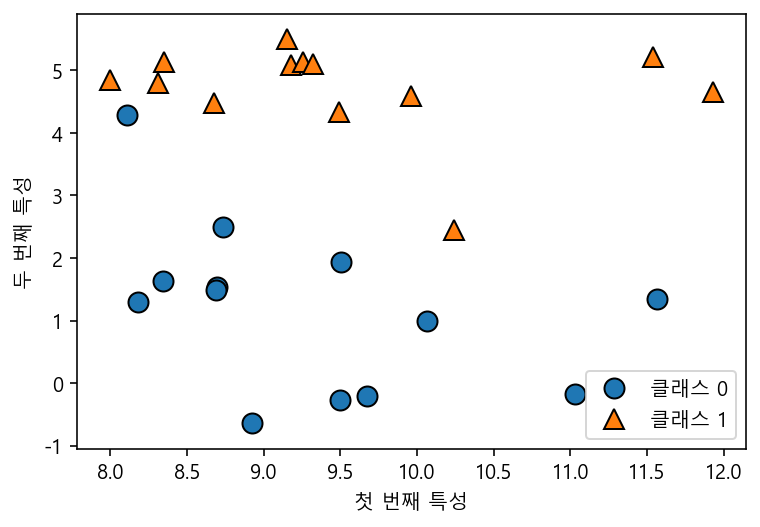

In [4]:
# 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 산점도 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel('첫 번째 특성')
plt.ylabel('두 번째 특성')
print('X.shape : ', X.shape)
# plt.show()

Text(0, 0.5, '타깃')

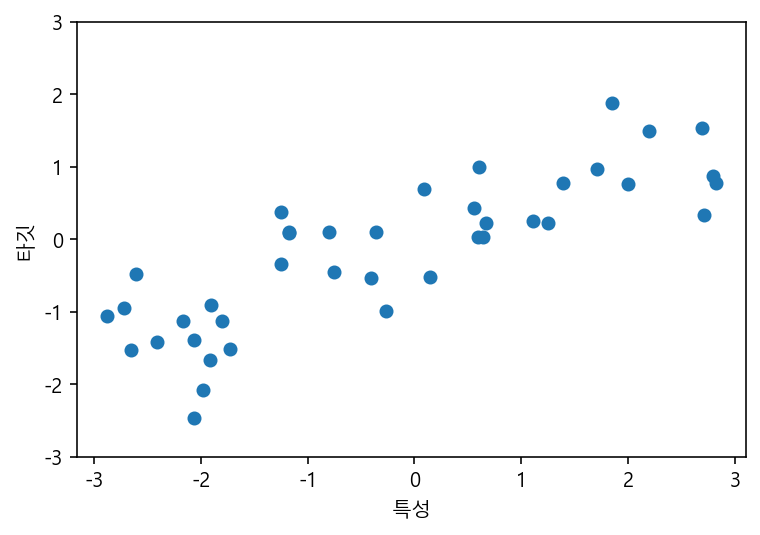

In [5]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')

Text(0, 0.5, '타깃')

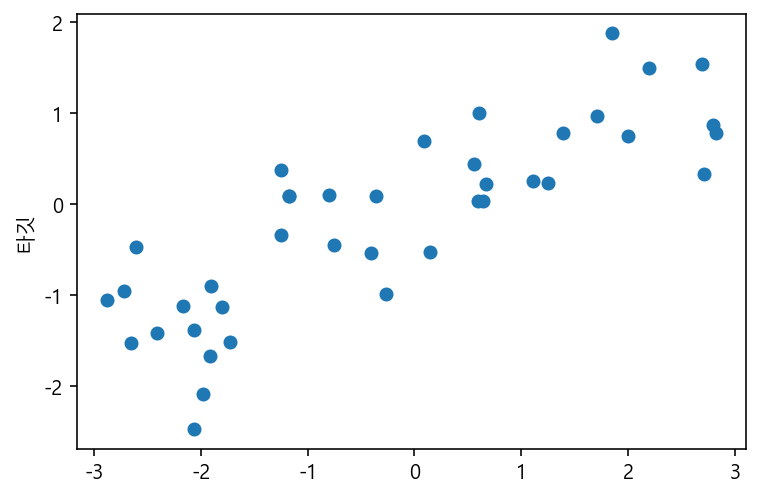

In [6]:
X,y = mglearn.datasets.make_wave(n_samples=40) #40개의 임의의 X,y 축을 갖는 좌표 생성
plt.plot(X,y,'o')
# plt.ylim(-3,3)
# plt.xlabel('특성')
plt.ylabel('타깃')

### ▼②Wisconsin Breast Cancer (위스콘신 유방암 데이터)

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys() : \n',cancer.keys())

cancer.keys() : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print('유방암 데이터의 형태 : ', type(cancer.data))
print('유방암 데이터의 형태 : ', cancer.data.shape)

유방암 데이터의 형태 :  <class 'numpy.ndarray'>
유방암 데이터의 형태 :  (569, 30)


In [9]:
print('클래스별 샘플 개수 : \n',
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [10]:
print('특성이름 : \n', cancer.feature_names)

특성이름 : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


- malignant : 악성 암종양
- benign : 해롭지 않은 종양

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태 : ', boston.data.shape)

데이터의 형태 :  (506, 13)


In [18]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape : ', X.shape)

X.shape :  (506, 104)


## 2.3.4 k-최근접 이웃

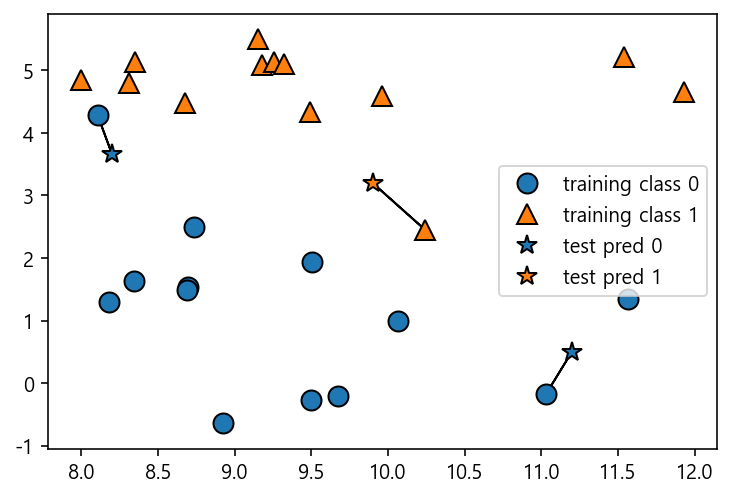

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

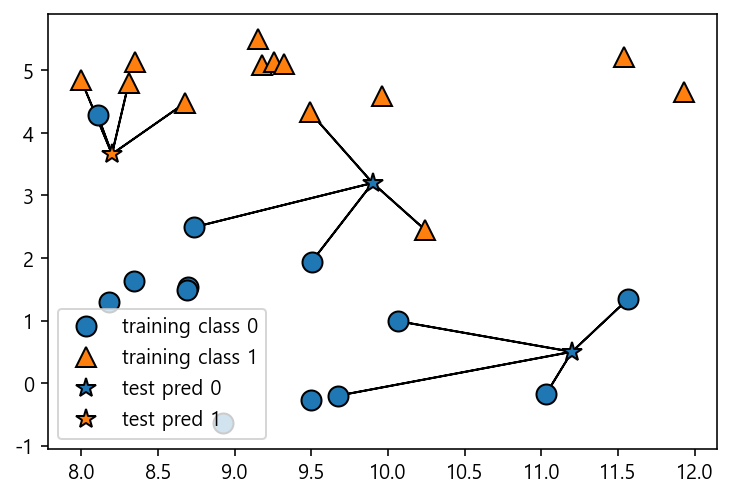

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [11]:
from sklearn.model_selection import train_test_split

In [20]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [22]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
print('테스트 세트 예측 : ', clf.predict(X_test))

테스트 세트 예측 :  [1 0 1 0 1 0 0]


In [24]:
print('테스트 세트 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


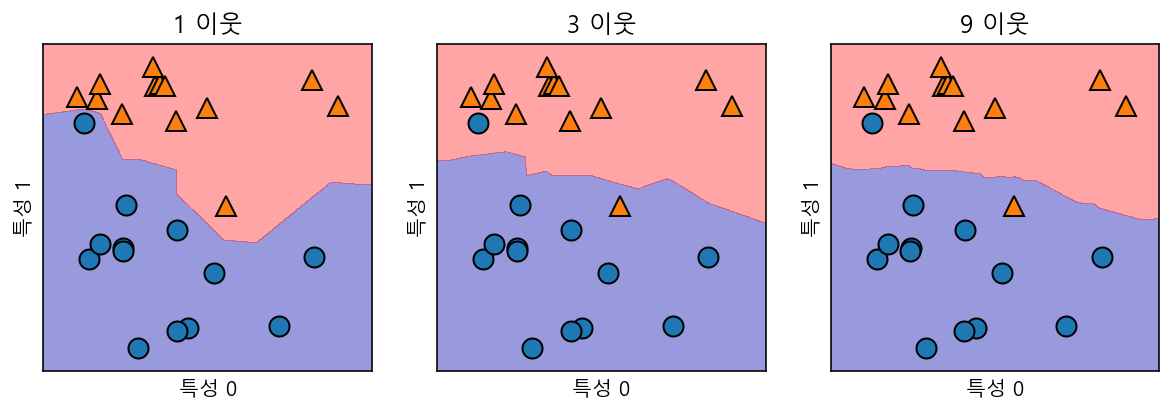

In [26]:
# 번형

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,3,figsize=(10,3))

for i, axes in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X,y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=axes, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=axes)
    
    axes.set_title('{} 이웃'.format(i))
    axes.set_xlabel('특성 0')
    axes.set_ylabel('특성 1')

# axes[0].legend(loc=3)

< zip 예시 >
- zip : 동일한 개수로 이루어진 자료형을 묶어주는 함수 (개수 달라도 묶을 수 있음)

In [80]:
name = ['Lee', 'Kim', 'Park', 'Han', 'Choi']
score = [95,96,97,94]

for name, score in zip(name, score):
    print(name, score)

Lee 95
Kim 96
Park 97
Han 94


In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

#  stratify : 비율을 유지하여 분할 >> 발암 환자의 비율을 분할 후에도 유지하기 위해 적용
#  random_state : 재현가능성을 위해서 난수 초기값으로 아무 숫자나 지정 -> 같은 결과값이 나오도록

In [28]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

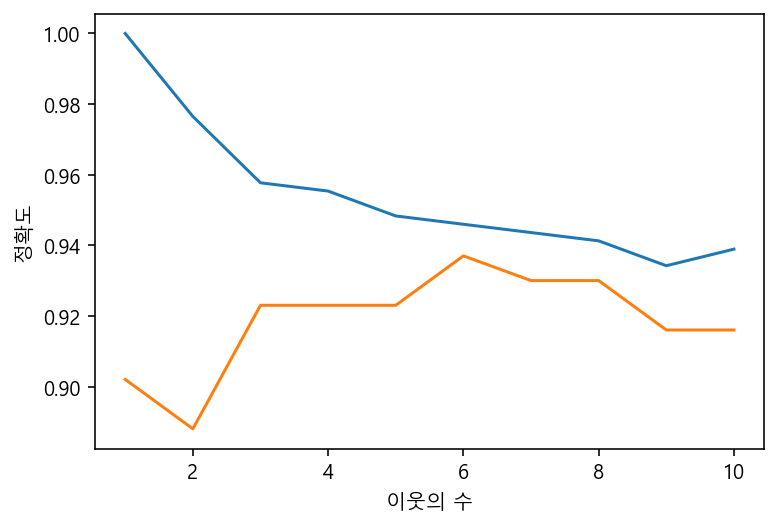

In [29]:
for n_neighbors in neighbors_settings : 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train)) # train 데이터에 대한 정확도 분석을 할 필요가 있나 싶음..
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도') 
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('이웃의 수')
plt.legend
plt.show()

## k-최근접 이웃 회귀

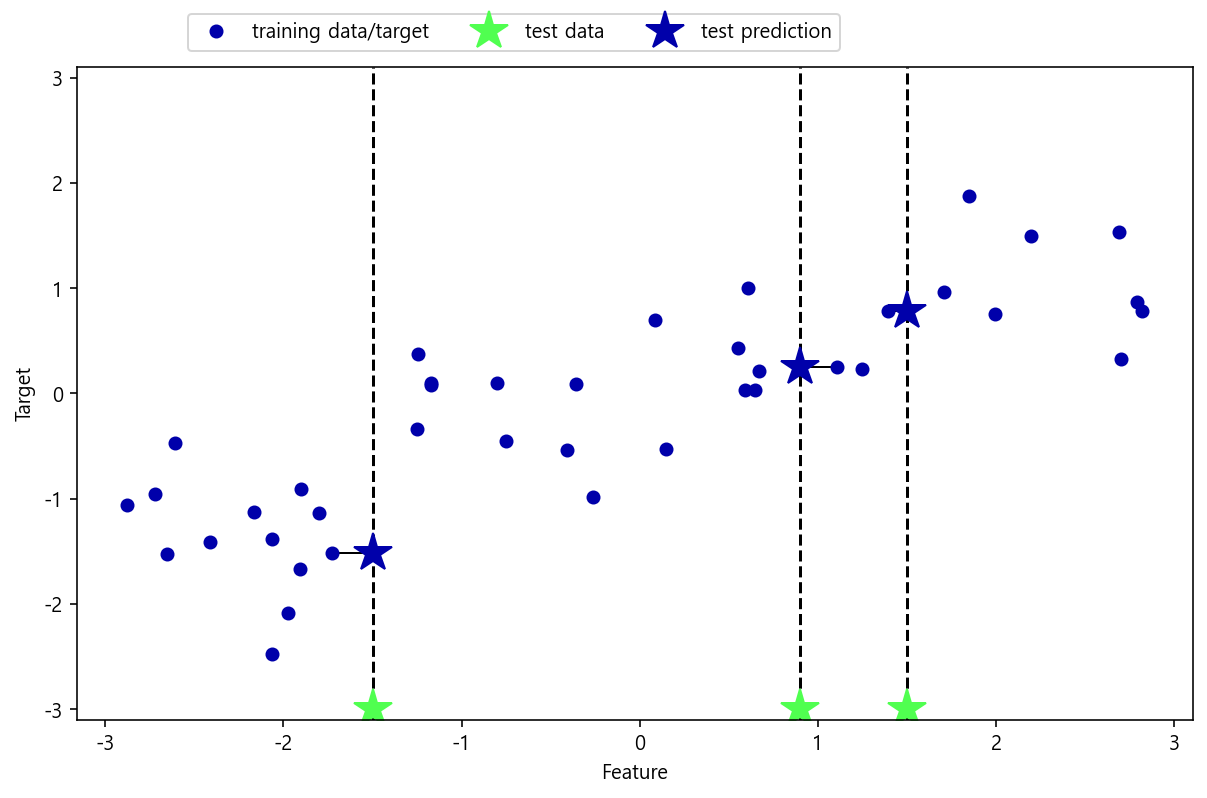

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

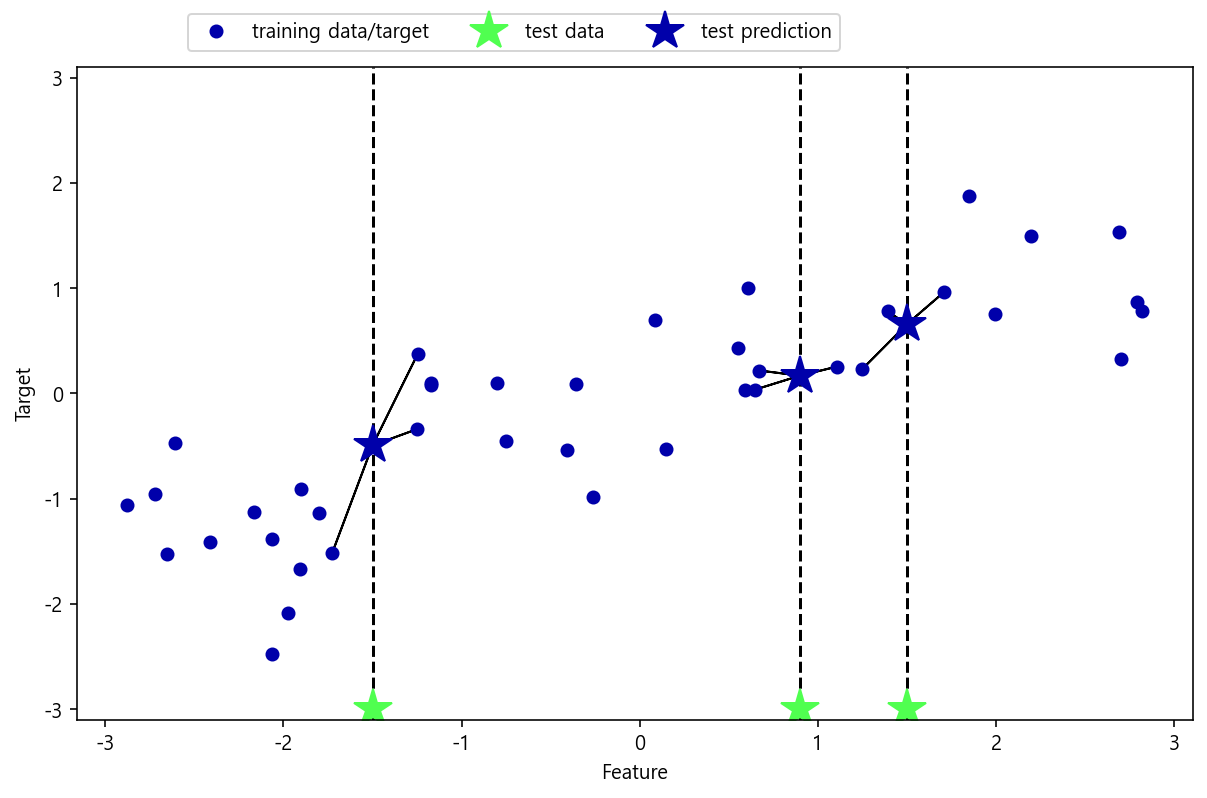

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [44]:
print('테스트 세트 예측 : ', reg.predict(X_test))

테스트 세트 예측 :  [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [45]:
print('테스트 세트 R 결정계수 : {:.2f}'.format(reg.score(X_test,y_test)))

테스트 세트 R 결정계수 : 0.83


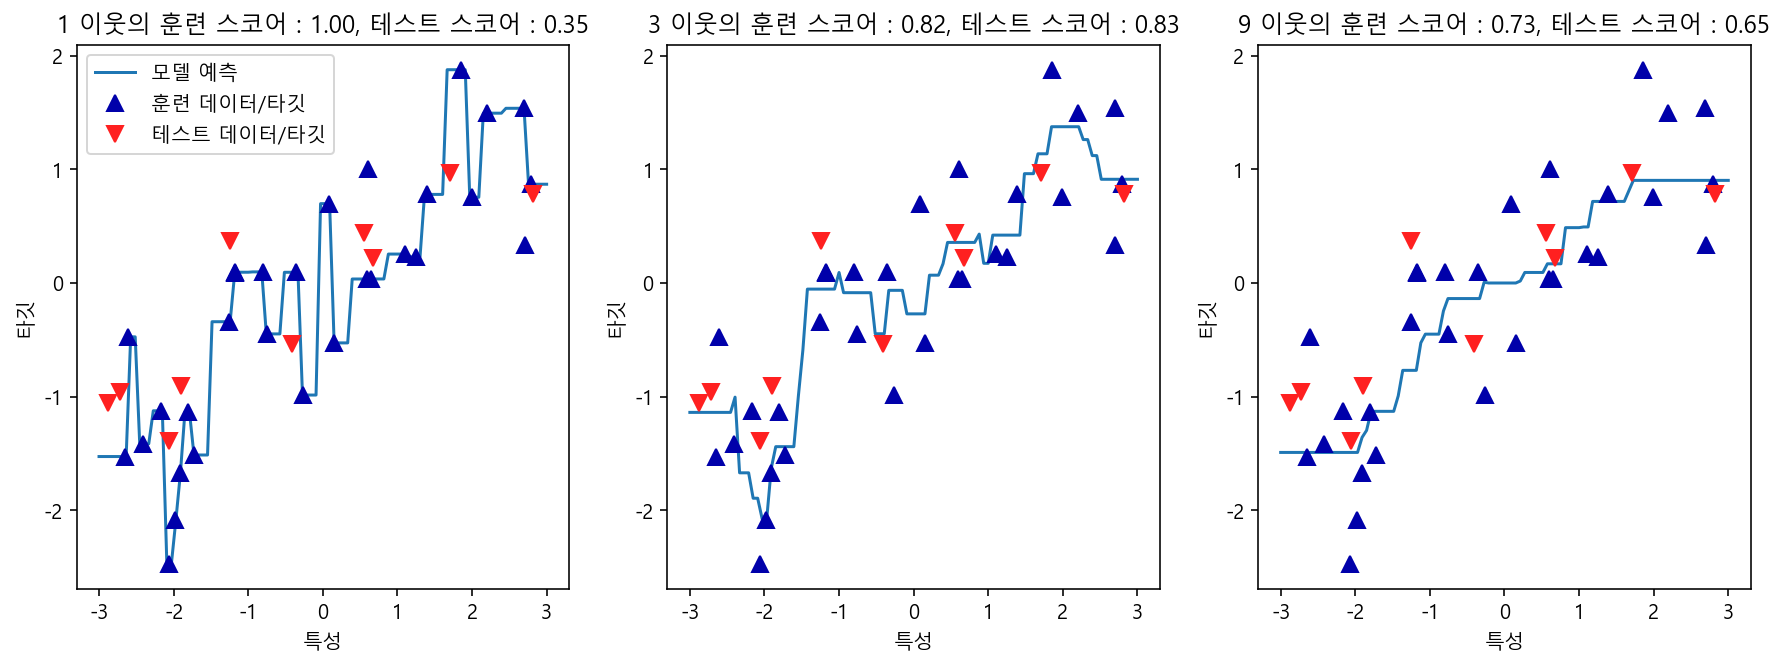

In [64]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

line = np.linspace(-3,3,100).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    
    ax.set_title('{} 이웃의 훈련 스코어 : {:.2f}, 테스트 스코어 : {:.2f}'
                 .format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
    
axes[0].legend(['모델 예측', '훈련 데이터/타깃', '테스트 데이터/타깃'], loc='best')

## 2.3.3 선형 모델

w[0]: 0.393906  b: -0.031804


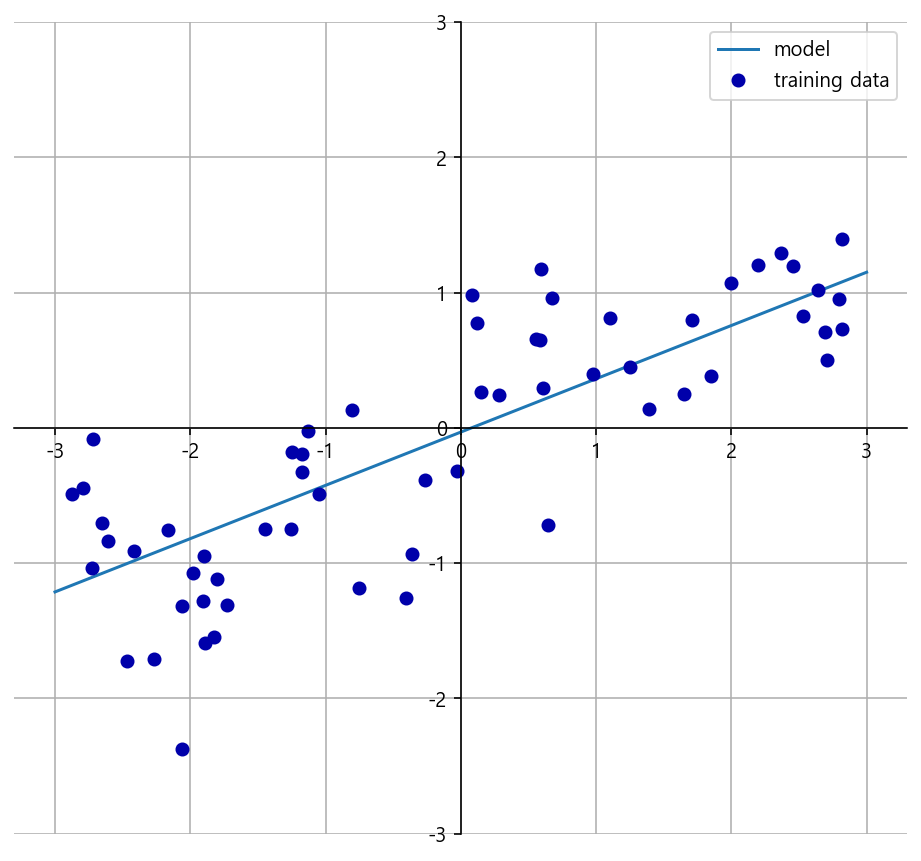

In [124]:
mglearn.plots.plot_linear_regression_wave()

## 선형 회귀(최소 제곱법)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [68]:
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [69]:
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


▶ train 데이터와 test 데이터의 R2 점수 차이가 거의 같다 -> **과소 적합 상태임을 의미**

#### Boston housing(extended) 데이터로 살펴보기

In [70]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [71]:
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


▶ train 데이터와 test 데이터의 R2 점수 차이가 매우 크다 -> **과대 적합 상태임을 의미**

## 리지 회귀

In [72]:
from sklearn.linear_model import Ridge

In [73]:
ridge = Ridge().fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


### ▼ alpha 값 조정

In [74]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [75]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


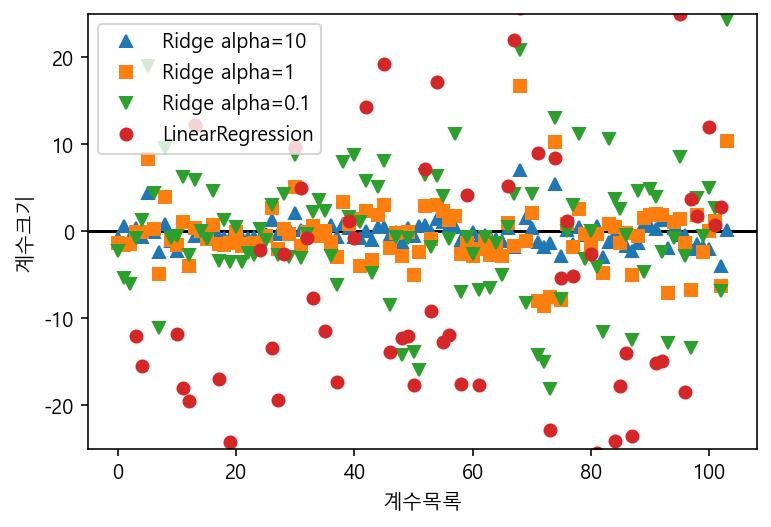

In [76]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('계수목록')
plt.ylabel('계수크기')

xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

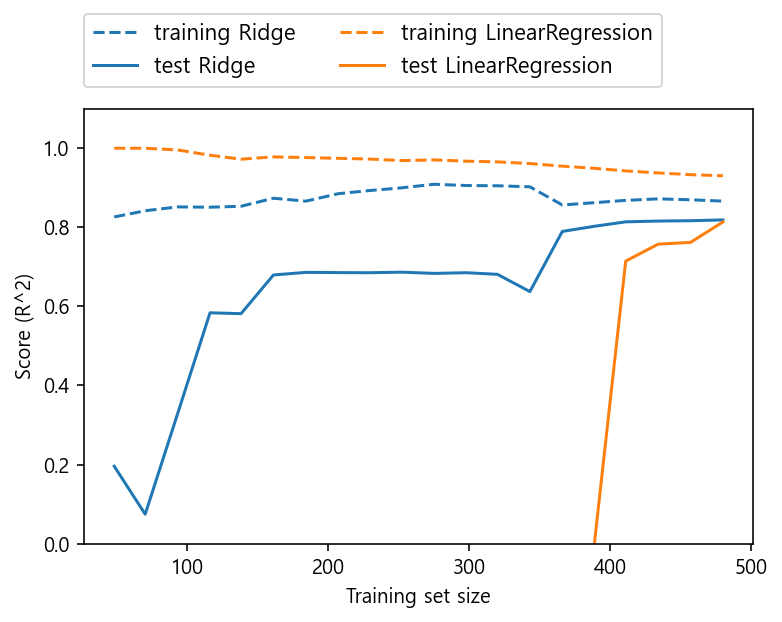

In [77]:
mglearn.plots.plot_ridge_n_samples()

## 라소

In [78]:
from sklearn.linear_model import Lasso

In [79]:
lasso = Lasso().fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso.score(X_test, y_test)))
print('사용한 특성의 개수 : ', np.sum(lasso.coef_!=0)) # 계수가 0인것은 분석에 적용되지 않은 특징이므로 0이 아닌것을 출력

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 :  4


In [82]:
#alpha의 default는 1.0
# max_iter 는 반복 실행 최대 횟수를 의미한다. - 책의 가이드에 따라 100000로 입력

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 

print('훈련 세트 점수 : {:.2f}'.format(lasso001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso001.score(X_test, y_test)))
print('사용한 특성의 개수 : ', np.sum(lasso001.coef_!=0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 :  33


In [83]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 

print('훈련 세트 점수 : {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('사용한 특성의 개수 : ', np.sum(lasso00001.coef_!=0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 개수 :  96


▶ 0.01보다 정확도가 낮아졌다. >> 과대 적합 발생

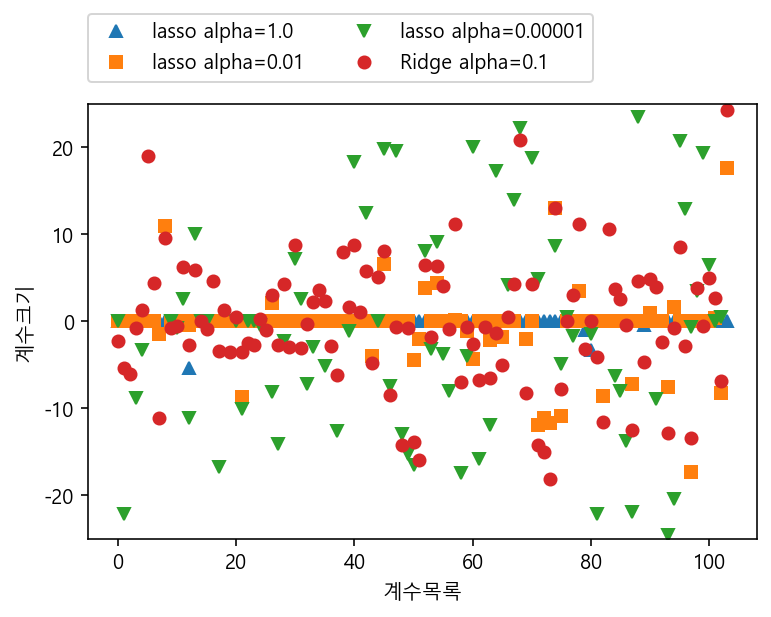

In [157]:
plt.plot(lasso.coef_, '^', label='lasso alpha=1.0')
plt.plot(lasso001.coef_, 's', label='lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='lasso alpha=0.00001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')

plt.xlabel('계수목록')
plt.ylabel('계수크기')

plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0,1.05)) # legend의 위치 설정 : 2열, 그래프와의 거리

## 분류용 선형 모델

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

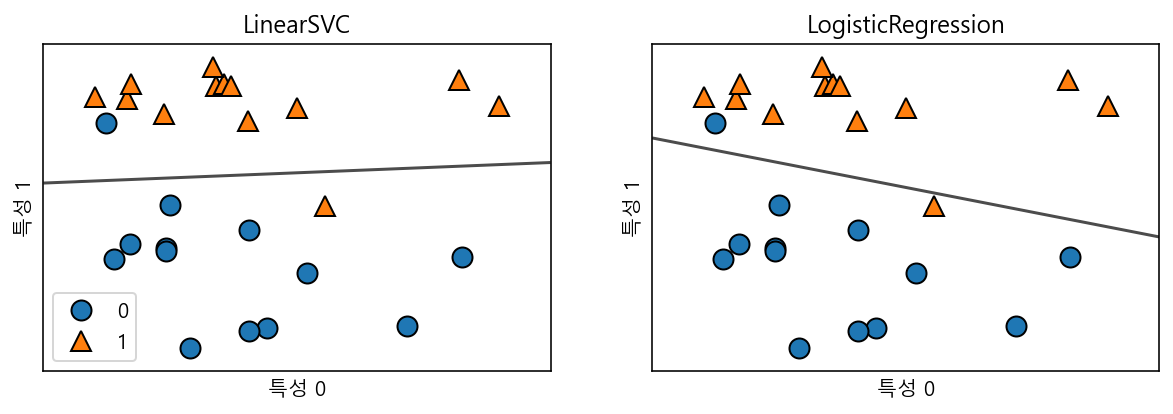

In [97]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes) :
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

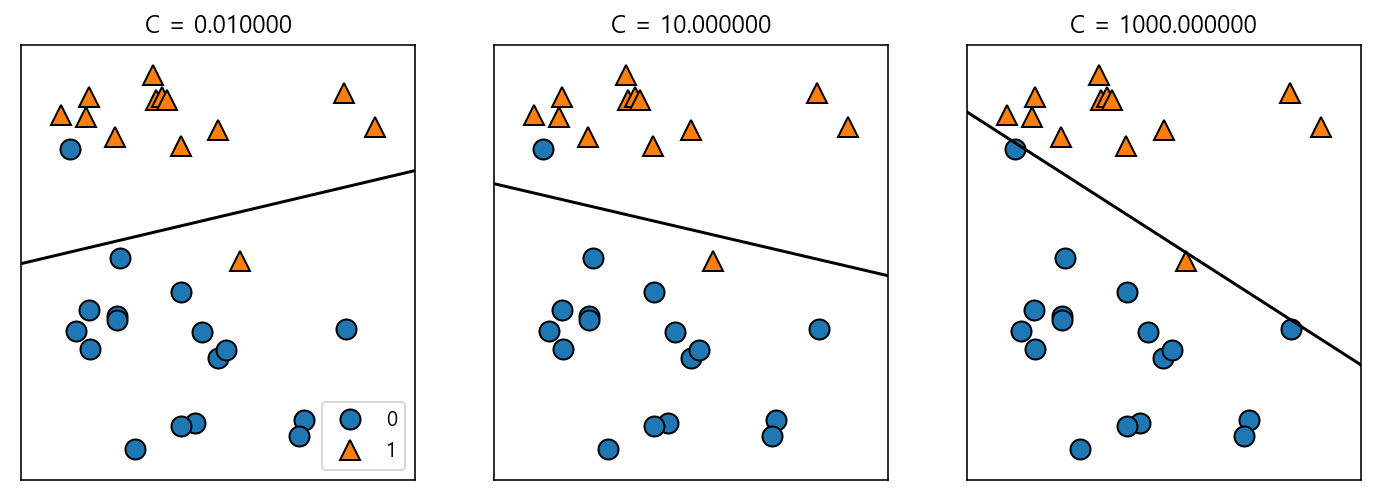

In [98]:
mglearn.plots.plot_linear_svc_regularization()

In [111]:
from sklearn.datasets import load_breast_cancer

In [112]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [125]:
logreg = LogisticRegression().fit(X_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(logreg.score(X_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg.score(X_test, y_test)))

훈련 세트 점수 : 0.941
테스트 세트 점수 : 0.965


In [123]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.951
테스트 세트 점수 : 0.958


In [124]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.937
테스트 세트 점수 : 0.930


#### 매개변수 C를 서로 다르게 학습시킨 모델의 계수 확인

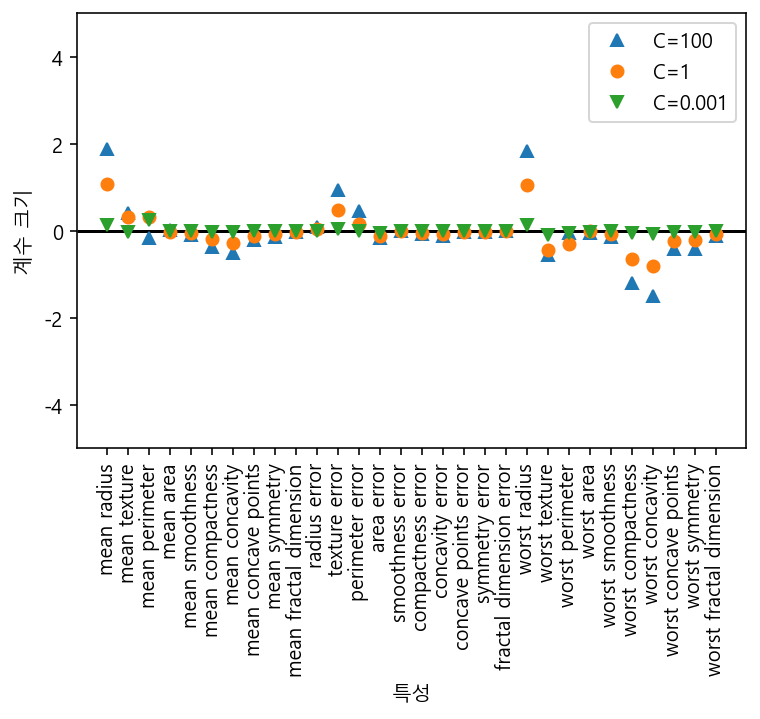

In [141]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)

plt.ylim(-5,5)
plt.xlabel('특성')
plt.ylabel('계수 크기')

plt.legend()

In [ ]:
L1규제를 사용할 때의 분류 정확도와 계수 그래프

C=0.00인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.00인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.00인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.00인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.00인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.00인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


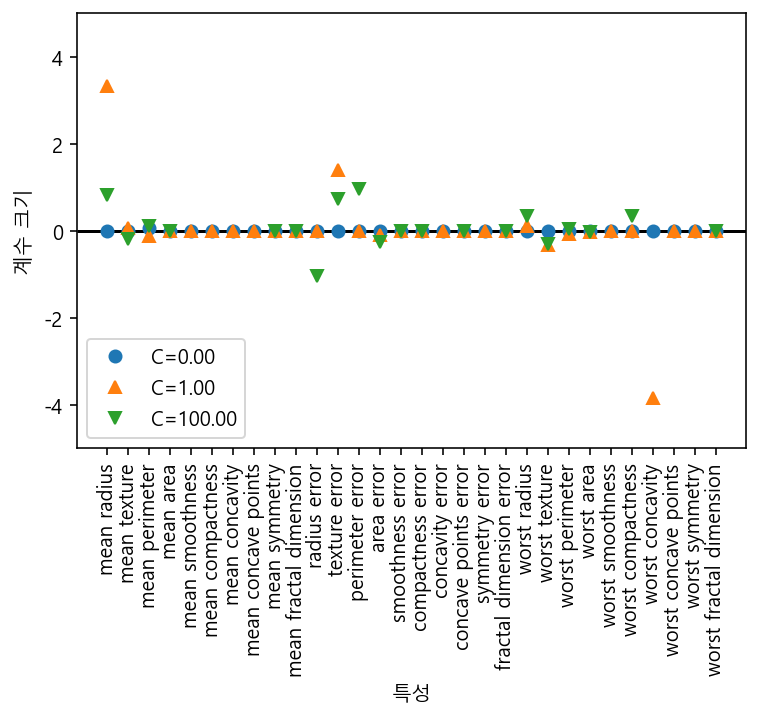

In [150]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1').fit(X_train, y_train)
#     solver='liblinear'  >>  사이킷런 업데이트에 따라 solver 매개변수 기본값이 lbfgs로 빠귐. 이는 L1규제를 사용하지 못해 liblinear로 변경
    print('C={:.2f}인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('C={:.2f}인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.2f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel('특성')
plt.ylabel('계수 크기')

plt.ylim(-5,5)
plt.legend(loc=3)

In [151]:
from sklearn.datasets import make_blobs

#### 세 개의 클래스를 가진 단단한 데이터셋 생성

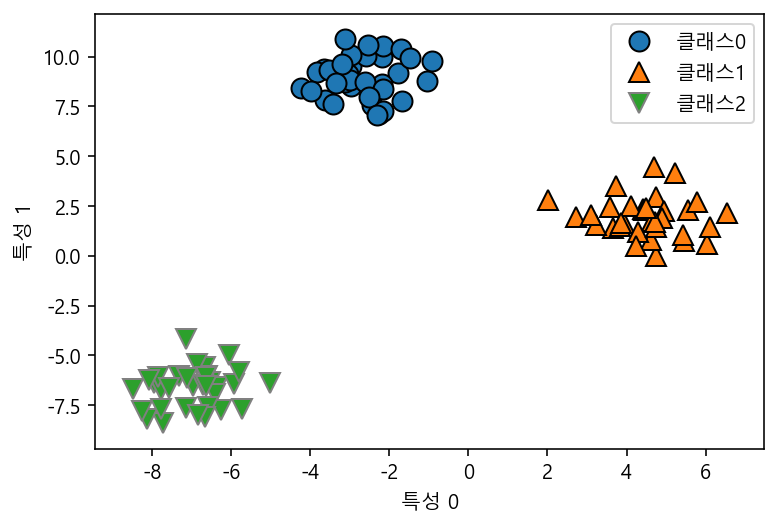

In [154]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1],y)

plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스0', '클래스1', '클래스2'])

In [156]:
linear_svm = LinearSVC().fit(X, y)

print('계수 배열의 크기 : ', linear_svm.coef_.shape)
print('절편 배열의 크기 : ', linear_svm.intercept_.shape)

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


In [161]:
linear_svm.coef_

array([[-0.17492064,  0.23140479],
       [ 0.47621609, -0.06937411],
       [-0.18914425, -0.20399822]])

In [160]:
linear_svm.intercept_

array([-1.07745287,  0.13140352, -0.08604886])

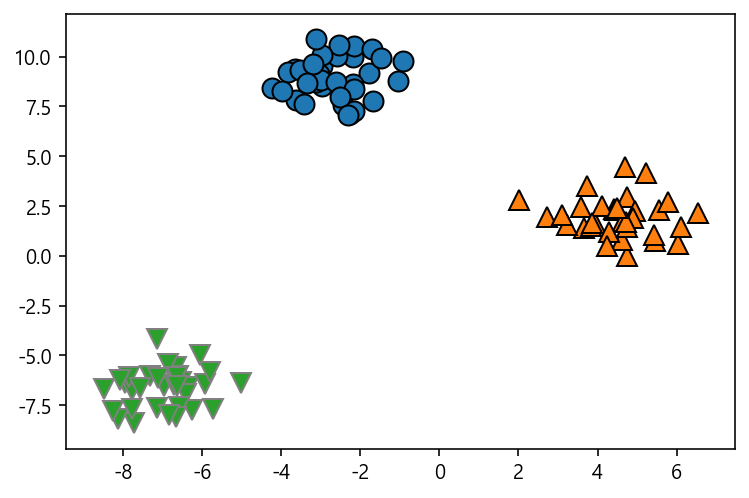

In [169]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)

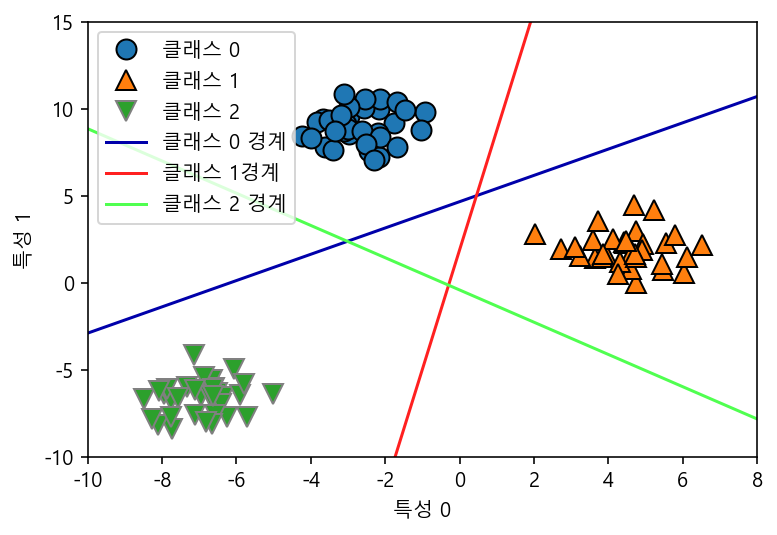

In [183]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1경계', '클래스 2 경계'])

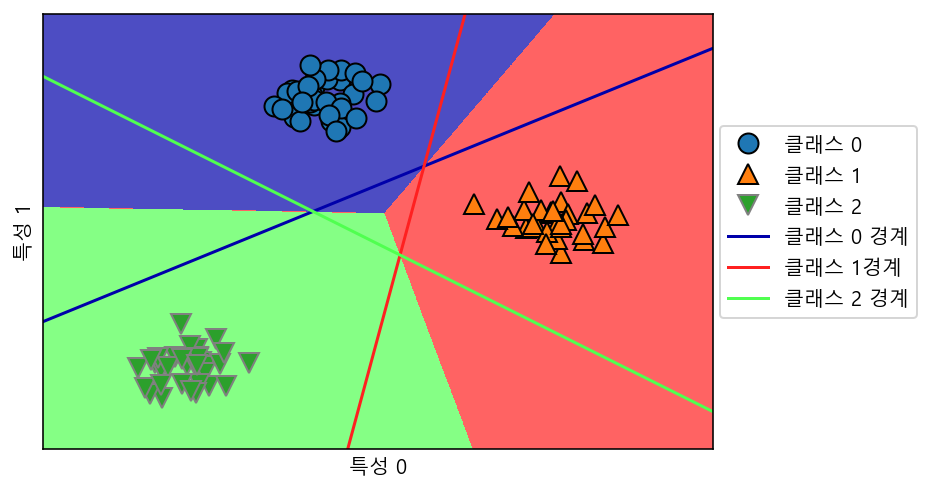

In [188]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept) / coef[1], c=color)
    
# plt.ylim(-10, 15)
# plt.xlim(-10, 8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1경계', '클래스 2 경계'], loc=(1.01, 0.3))

-------------------------

## 2.3.4 나이브 베이즈 분류기

이해가 안돼서 일단 Skip.... (99p)

## 2.3.5 결정 트리

In [ ]:
# 작동 안함..
mglearn.plots.plot_animal_tree()

#### 결정 트리 만들기

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


#### 깊이를 최대 4개로 제한 (max_depth=4)

In [15]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


#### 트리의 특성 중요도

In [28]:
print('특성 중요도 : \n', tree.feature_importances_)

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


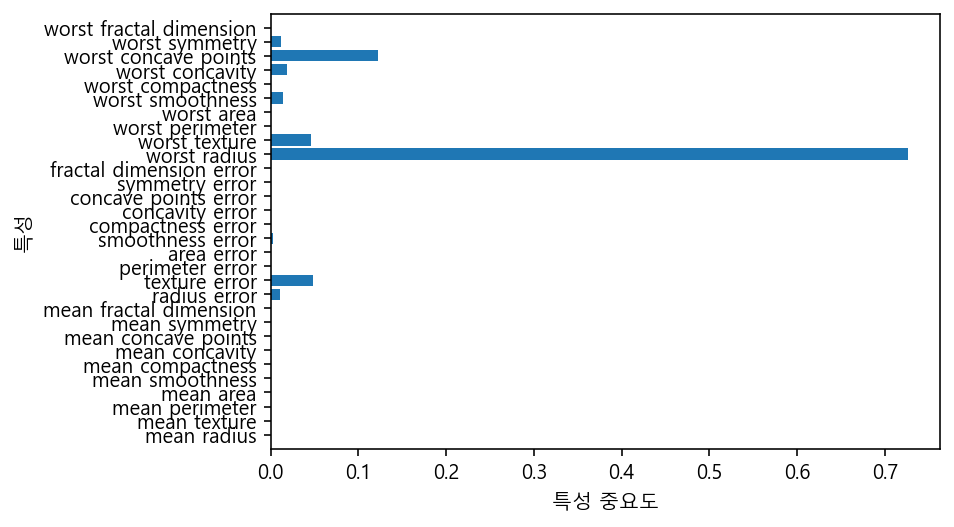

In [39]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_,  align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

In [31]:
cancer.data.shape

(569, 30)

Feature importances: [0. 1.]


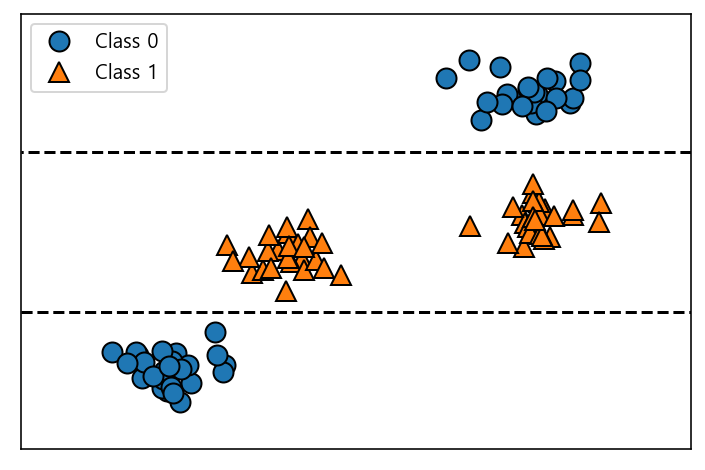

In [41]:
tree = mglearn.plots.plot_tree_not_monotone()
# display(tree)

In [46]:
import os

Text(0, 0.5, '가격 ($/Mbyte)')

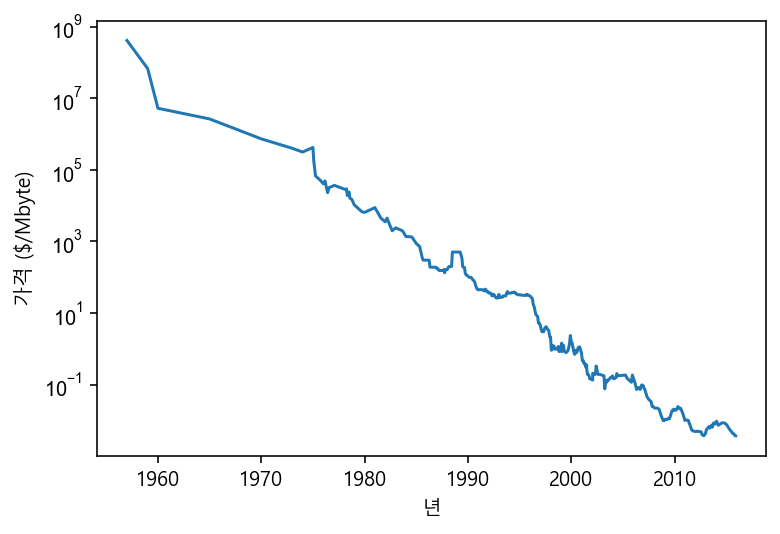

In [51]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')

In [ ]:
from sklearn.tree